In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.misc import factorial
%matplotlib inline

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

# Exercise 1 

In [7]:
# (a)
# Define the function that will return the observed P(N,x) with M realizations
def obs_bin(N,M):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.randint(2, size=N)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
        #print (counts)
        ave_counts = counts/M
    return ave_counts

# Define the analytical calculation function of the PDF
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx

In [8]:
# (f)
# Define function to calculate the expectation value from observed value
# Note: Need to first run the obs_bin to obtain an array of observed probability
def obs_exp_fnc(obs_pro):
    x = np.arange(len(obs_pro))
    exp = np.sum(x*obs_pro)
    return exp

In [9]:
# (b)(c)(d)
# Inputs: N: number of trails in each realization
#         M: number of realizations
# Return: ave_counts: the averaged counts of x success in N trails out of the M realizations
# Intermediate: heads_count/tails_count: counts of number of success/fail within one realization 

# Set constants
N_obs = 20
M_obs= 100000
p = 0.5

# Observation
obs_pro = obs_bin(N=N_obs,M=M_obs)
# Analytical Calculation
ana_pro = PNx(N=N_obs)

# Expectation value from observation
obs_exp = obs_exp_fnc(obs_pro)
# Expectation value from analytic equation
ana_exp = N_obs*p

print('The expectation value from observation is {:3f}, and the analytical expectation is {} in '.format(obs_exp,ana_exp),N_obs,' trails.')
plt.bar(np.arange(N_obs+1), obs_pro)
plt.plot(np.arange(N_obs+1), ana_pro)
plt.xlabel('Number of success (x) in one realization')
plt.ylabel('Fraction of realizations with x number of success')


The expectation value from observation is 10.006470, and the analytical expectation is 10.0 in  20  trails.


In [10]:
# Set constants
N_obs = 40
M_obs= 100000
p = 0.5

# Observation
obs_pro = obs_bin(N=N_obs,M=M_obs)
# Analytical Calculation
ana_pro = PNx(N=N_obs)

# Expectation value from observation
obs_exp = obs_exp_fnc(obs_pro)
# Expectation value from analytic equation
ana_exp = N_obs*p

print('The expectation value from observation is {:3f}, and the analytical expectation is {} in '.format(obs_exp,ana_exp),N_obs,' trails.')
plt.bar(np.arange(N_obs+1), obs_pro)
plt.plot(np.arange(N_obs+1), ana_pro)
plt.xlabel('Number of success (x) in one realization')
plt.ylabel('Fraction of realizations with x number of success')

The expectation value from observation is 20.024160, and the analytical expectation is 20.0 in  40  trails.


# Exercise 2

In [11]:
# (b)
# Define the function that will return the observed P(N,x) with M realizations
def obs_bin_var(N,M,p):
    counts = np.zeros(N+1)
    for i in range(0,M):
        heads_count = np.random.binomial(N,p)
        counts[heads_count] = counts[heads_count] + 1
    #print (counts)
    ave_counts = counts/M
    return ave_counts

# Define the analytical calculation function of the Binomial PDF
def PNx_var(N,p):
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return PNx

# Define the analytical calculation function of the Poisson PDF
def Poi_var(N,p):
    x = (np.arange(N+1))
    Poi = ((N*p)**x)*(np.exp(-N*p))/(factorial(x))
    return Poi

In [12]:
# (d)
# Define function to calculate the variance from observed value
# Note: Need to first run the obs_bin_var to obtain an array of observed probability
def obs_var_fnc(obs_pro):
    x = np.arange(len(obs_pro))
    x_sqr = np.square(x)
    fir_term = np.sum(x_sqr*obs_pro)
    sec_term = np.square(np.sum(x*obs_pro))
    return fir_term-sec_term

The mean from observation is 0.997460, and variance is 0.9935535484000002 at p = 0.01 .


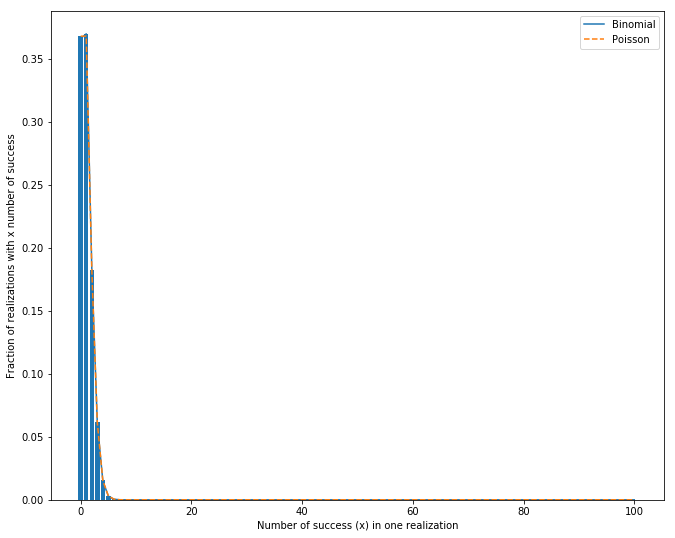

In [31]:
# Set constants
N_obs = 100
M_obs= 100000
p = 0.01

# Observation
obs_pro = obs_bin_var(N=N_obs,M=M_obs,p=p)


# (c)
# Analytical Calculation using Binomial PDF
ana_pro_bin = PNx_var(N=N_obs,p=p)

# Analytical Calculation using Poisson PDF
ana_pro_poi = Poi_var(N=N_obs,p=p)

plt.bar(np.arange(N_obs+1), obs_pro)
plt.plot(np.arange(N_obs+1), ana_pro_bin, label='Binomial')
plt.plot(np.arange(N_obs+1), ana_pro_poi, '--',label='Poisson')
plt.legend()
plt.xlabel('Number of success (x) in one realization')
plt.ylabel('Fraction of realizations with x number of success')

# (d)
# Calculate variance numerically
obs_var = obs_var_fnc(obs_pro)

# Calculate mean numerically
obs_exp = obs_exp_fnc(obs_pro)

print('The mean from observation is {:3f}, and variance is {} at p = {} .'.format(obs_exp,obs_var,p))

In [17]:
# Define the function to calculate the variance and mean for multiple p
def test_mul_p(p):
    obs_exp = np.zeros(len(p))
    obs_var = np.zeros(len(p))
    ana_exp = np.zeros(len(p))
    ana_var = np.zeros(len(p))
    for i in range(0,len(p)):
        # Observation
        obs_pro = obs_bin_var(N=N_obs,M=M_obs,p=p[i])
        # Calculate variance numerically
        obs_var[i] = obs_var_fnc(obs_pro)
        # Calculate mean numerically
        obs_exp[i] = obs_exp_fnc(obs_pro)
    
        # Theoretical mean and variance from Poisson PDF
        ana_exp[i] = N_obs*p[i]
        ana_var[i] = N_obs*p[i]
    return obs_exp,obs_var,ana_exp,ana_var

In [29]:
# Set constants
N_obs = 100
M_obs= 100000
p_mul = np.arange(0.01,0.2,0.01)
# Calculate
obs_exp,obs_var,ana_exp,ana_var = test_mul_p(p=p_mul)

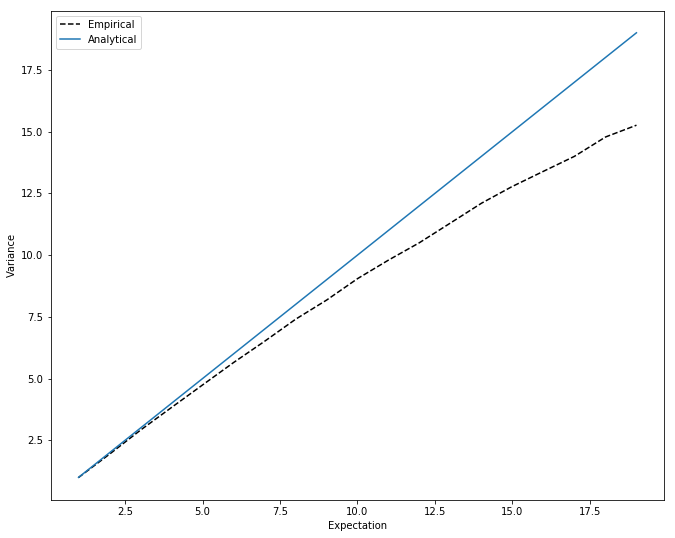

In [30]:
# Plot the result for expectation value
plt.plot(p_mul, obs_exp, 'k--',label='Numerical Result')
plt.plot(p_mul, ana_exp, label='Analytical Result from Poisson Distribution')
plt.legend()
plt.xlabel('p value')
plt.ylabel('Expectation/Mean')
plt.show()

# Plot the result for variance
plt.plot(p_mul, obs_var, 'k--',label='Numerical Result')
plt.plot(p_mul, ana_var, label='Analytical Result from Poisson Distribution')
plt.legend()
plt.xlabel('p value')
plt.ylabel('Variance')
plt.show()

# Plot the result for variance
plt.plot(obs_exp, obs_var, 'k--',label='Empirical')
plt.plot(ana_exp, ana_var, label='Analytical')
plt.legend()
plt.xlabel('Expectation')
plt.ylabel('Variance')
plt.show()